# **Mushroom Classification Using K-Nearest Neighbors (KNN), Support Vector Machine, and Random Forest Algorithms**
*Authors: Atahan Çaldır, Musa Berkay Kocabaşoğlu, Kerem Ersan* 

*Class: CS 454 - Introduction to Machine Learning and Artificial Neural Networks by Ethem Alpaydın*

There are countless types of mushrooms in the world. The biggest problem with mushrooms to
date is which mushrooms are edible and which are poisonous.The aim of our project is to create a
model that shows which mushrooms are edible and which are poisonous by analyzing some properties
of edible and poisonous mushrooms, ultimately, using this model to discover whether an unknown
mushroom is edible or not.

## **1 - Importing Mushroom Dataset**
First, we start by importing the most essential libraries that we will need to import and analyze the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will important the mushroom data. The source of the data is [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom). We downloaded the *.csv* file from Kaggle due to easier usage.

In [2]:
dataset = pd.read_csv('mushrooms.csv')

Now, the mushrooms.csv dataset is imported to the environment.

## **2 - Understanding the data**
Now, we should analyze the dataset from various aspects to understand its structure better. Let's see the first 5 rows of the data:

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


As it can be seen on the above table, values are single letters in this dataset where each letter corresponds to a specific meaning (e.g. in the "cap-shape" column, b=bell, c=conical, f=flat, s=sunken).

Since the most important and targeted column of this data is the "class" column, we should know that;
*   p = poisonous
*   e = edible

Let's check the columns and see if there is any *null* variable in the data:


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
dataset.isna().sum().sum()

0

There is no *null* variables in this data. Now, let's check if there is any other class than "poisonous" and "edible":

In [6]:
dataset["class"].unique()

array(['p', 'e'], dtype=object)

There are only 2 classes as expected. Let's check the unique values of all columns:

In [7]:
for col in dataset.columns:
  print(dataset[col].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


There are many unique values in different features. The description of these values are given in the source of the data as;
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [8]:
dataset.shape

(8124, 23)

There are 8124 samples with 23 features where one of the features represent the class of the mushroom. Hence, we can say that the data has 22 independent variable where the class variable is the dependent variable.
Now, let's analyze the columns in detail:

In [9]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The detailed analysis clearly shows that the 51.8% of the  mushrooms are **edible** (4208 out of 8124 samples). 

## **3 - Data Preparation**

Since the values are letters and we need quantitative data to pass it through the machine learning models, we need to convert these values into quantitative versions using label encoders.

In [10]:
from sklearn.preprocessing import LabelEncoder
data_encoded = dataset.copy()
le = LabelEncoder()
for col in data_encoded.columns:
  data_encoded[col] = le.fit_transform(data_encoded[col])

data_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


The values are quantitative and can be used in the models now. For the "class" column, the corresponding values are as follow;
*   *1* = poisonous
*   *0* = edible

We can analyze the dataset again to see if we need feature scaling (normalization in range 0 to 1).

In [11]:
data_encoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Since the data range is not extreme and the variance is low enough, we do **not** need to normalize the values

The machine learning models need to be trained first and then tested for checking their accuracies. For this purpose, we need to prepare an X and a Y variable where;
*   X = independent variable (input): It keeps the 22 independent features of the mushrooms in n **m**x**n** matrix where m is the number of mushroom samples (8124) and n is the number of features (22).
*   Y = dependent variable (output): It keeps the class of the mushrooms in an **n** sized vector where n is the number of mushrooms (8124).

In [12]:
x = data_encoded.drop(["class"],axis=1)
y = data_encoded["class"].to_numpy()

In [13]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [14]:
y

array([1, 0, 0, ..., 0, 1, 0])

Dataset splitted into 2 parts which are train and test sets.

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## **4 - Data Visualization**

One of the best ways to understand a data is to see it visually. We can plot some aspects of the data for better understanding. Let's see the class distribution first:

In [16]:
import matplotlib.pylab as pylab
import seaborn as sns

def column_plot(column, hue=None, color=["blue", "purple"], labels=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=column, hue=hue, palette=color, saturation=0.6, data=dataset, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {column.title()} Distribution", xlabel=f"{column.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(("Poisonous", "Edible"), loc=0)

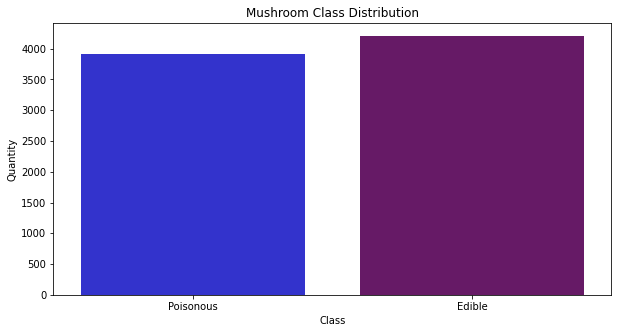

In [17]:
class_dict = ("Poisonous", "Edible")
column_plot(column="class", labels=class_dict)

To make a classification regarding the independent variables, classification algorithms check the relation of these independent variables with the dependent one(s). For instance, conical shaped mushrooms are tend to be poisonous slightly more than edible. To prove it, we can visualize the "cap-shape" column regarding the class of the mushrooms:

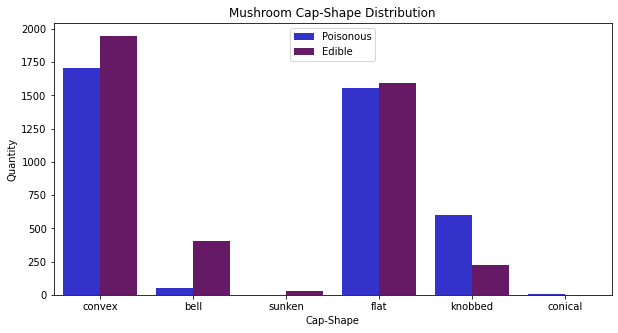

In [18]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ("convex", "bell", "sunken", "flat", "knobbed", "conical")
column_plot(column="cap-shape", hue="class", labels=labels)

We used the t-SNE statistical method in order to visually observe which mushrooms are poisonous or non-poisonous according to what. Thus, we were able to examine our high-dimensional data in a 2-dimensional way.

In [19]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(x)

c:\Users\Atahan\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


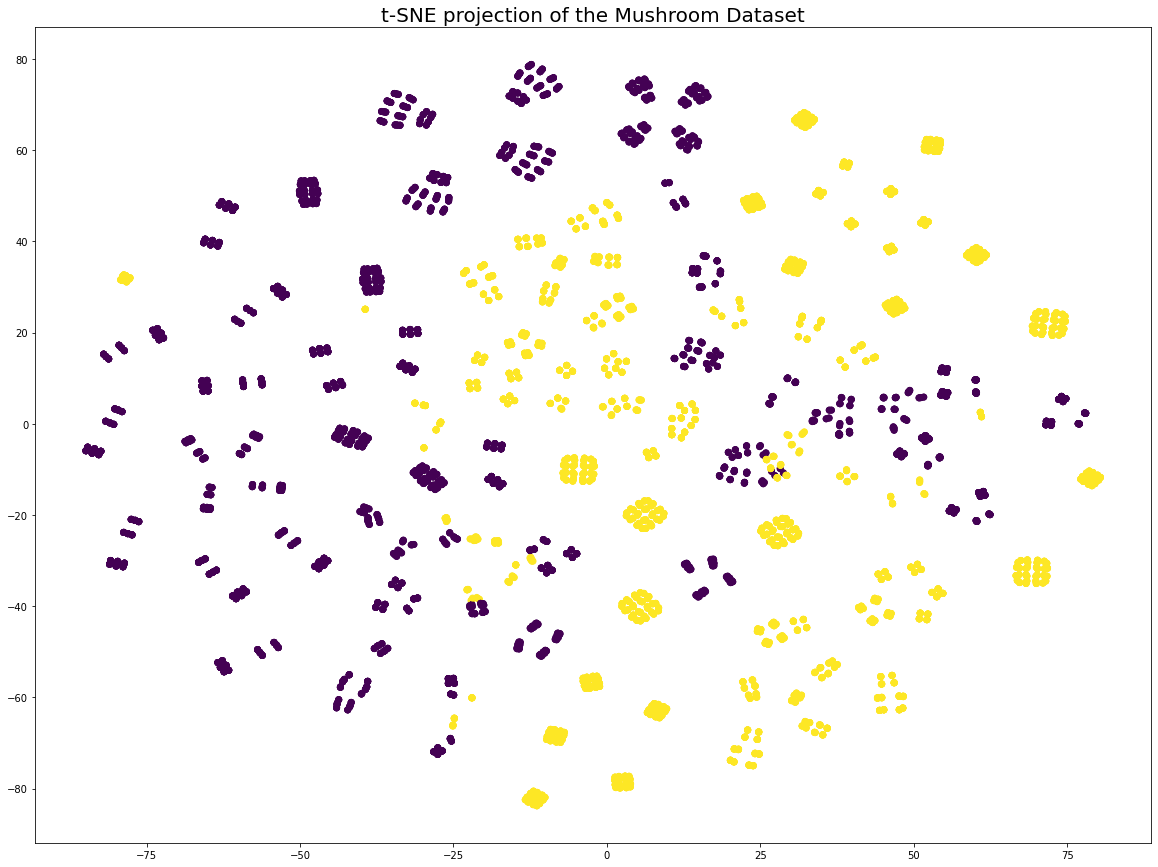

In [22]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y)
plt.title('t-SNE projection of the Mushroom Dataset', fontsize=20)
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

We visualized our data with another method which is UMAP. While t-SNE moves the high dimensional graph to a lower dimensional space points by points, UMAP compresses that graph.

In [21]:
#pip install umap-learn
import umap.umap_ as umap

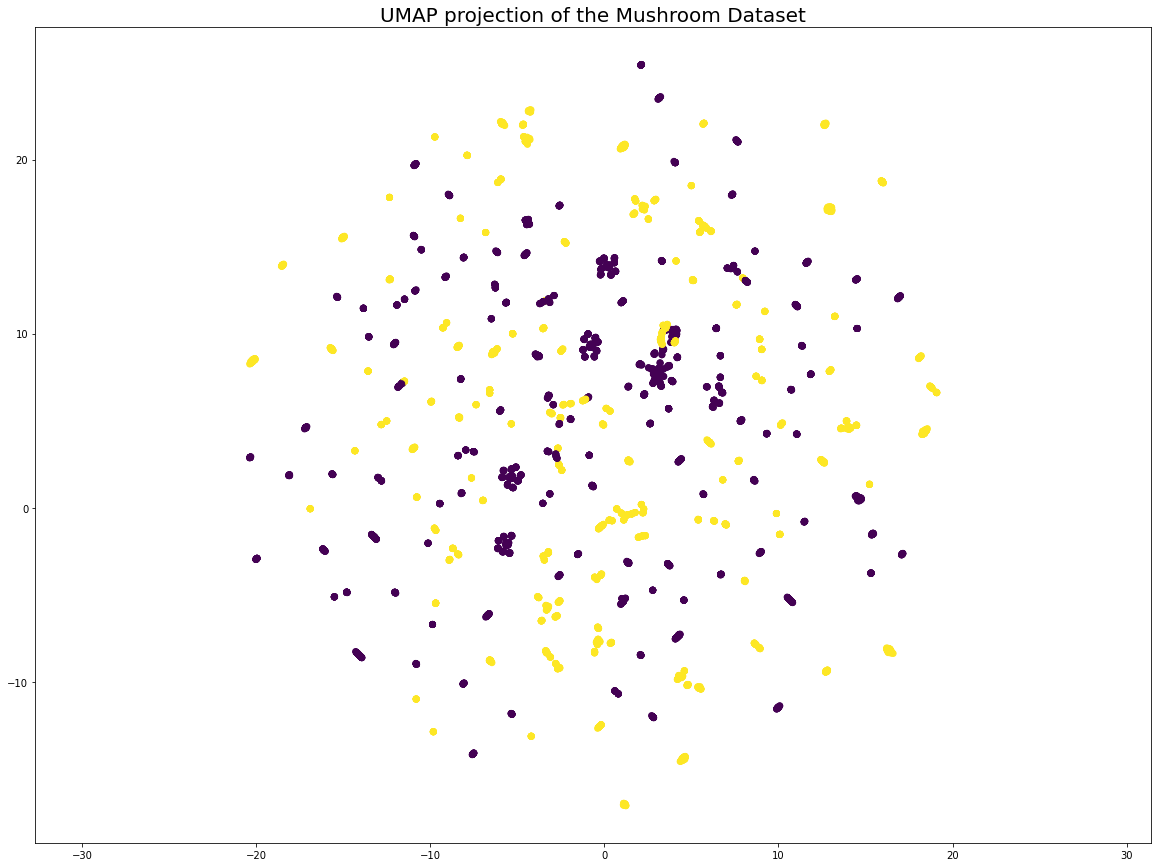

In [23]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(x)
plt.scatter(embedding[:, 0],embedding[:, 1],c=y)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Mushroom Dataset', fontsize=20)
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

Although it is not so obvious on the UMAP graph, we observed that our mushrooms can be easily distinguished from each other on the t-SNE graph.

## **5 - Classification of the Mushrooms**

### **5.1 - k-Fold Cross Validation**
We now have the train and test data. For the validation process, we will use only the train data which corresponds to 80% of the dataset.

Splitting a dataset into training and testing set is an essential and basic task when comes to getting a machine learning model ready for training. To determine if our model is overfitting or not, we need to test it on unseen data (validation set).

We will use k-Fold Cross-Validation method with k=5 as it is the most popular usage. In this case, data will be divided into k=5 pieces, and iteratively, each of the piece will be used as the validation data while the other ones are train data as a whole. At the end, we will have a k sized vector that contains the accuracy for each trial.

In [24]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

k_fold_split = 5

def model_validation(model):
  k_fold = KFold(n_splits=k_fold_split)
  acc_score = []

  for training_index , validation_index in k_fold.split(x_train):
      x_training, x_validation = x_train.iloc[training_index,:], x_train.iloc[validation_index,:]
      y_training, y_validation = y_train[training_index] , y_train[validation_index]
      
      model.fit(x_training, y_training)
      pred_values = model.predict(x_validation)
      
      acc = accuracy_score(pred_values , y_validation)
      acc_score.append(acc)
      
  return acc_score

### **5.2 - Classification via KNN, SVM, and RF**
We understood the data and prepared to be passed through classification algorithms in the previous sections. It is time to use the models over the data.

As expected in the project, we will use 3 different classification algorithms; K-Nearest Neighbors (KNN), Suppor Vector Machine (SVM), and Random Forest. Furhermore, we will use these algorithms with different possible hyperparameters and try to find the best settings by measuring the accuracies.

*Scikit-learn* library will be used for the implementation of the algorithms.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn #to use sklearn.base.clone for cloning the best models
import itertools #used for creating all of the element-combinations of the given list of lists
from tqdm import tqdm #used for printing the progress of the for loop

#### **5.2.1 - K-Nearest Neighbors (KNN)**

In the KNN classifier, these possible parameters values will be combined with each other (Parameters and possible inputs are taken from the official website of the Scikit-learn library):
* *n_neighbors* = Number of neighbors to use. This the k value:
  * From 1 to 15
* *weights* = Weight function used in prediction
  * ["uniform", "distance"]
* *algorithm* = Algorithm used to compute the nearest neighbors
  * "auto" will be left as default since it is already optimized.
* *leaf_size* = Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree.
  * from 30 to 35
* *p* = Power parameter for the Minkowski metric
  * from 1 to 3

All of the possible combinations of these values will be applied and the best accuracy will be printed with parameters.

In [26]:
best_knn_avg_acc = 0
best_knn_acc_list = []
best_knn_params = None
best_knn_model = None

n_neighbors = range(1, 16)
weights = ["uniform", "distance"]
leaf_size = range(30, 36)
p = range(1, 4)

param_combination = [n_neighbors, weights, leaf_size, p]

k_avg_accuracies = {} #this dictionary will collect the average accuries of different k valued models. Those accuracies' average will be reported
for i in n_neighbors:
    k_avg_accuracies[i] = []

print(f"{len(list(itertools.product(*param_combination)))} different combinations of the parameters will be tested using k-Fold Cross Validation.\n")

for comb in tqdm(itertools.product(*param_combination)):
    knn = KNeighborsClassifier(n_neighbors=comb[0], weights=comb[1], leaf_size=comb[2], p=comb[3])
    
    knn_accuracies = model_validation(knn)
    knn_avg_accuracy = sum(knn_accuracies)/k_fold_split

    k_avg_accuracies[comb[0]].append(knn_avg_accuracy)

    if knn_avg_accuracy > best_knn_avg_acc:
      best_knn_avg_acc = knn_avg_accuracy
      best_knn_params = comb
      best_knn_model = knn
      best_knn_acc_list = knn_accuracies

best_knn_model = sklearn.base.clone(best_knn_model) # deep copying the best model(untrained) to train again with the entire training data
best_knn_model.fit(x_train, y_train) # training the copied best model with the training data
test_pred_values = best_knn_model.predict(x_test)
test_acc = accuracy_score(test_pred_values , y_test)

print(f"\n---\nResult:\n\nBest model's parameters:\n\tk = {best_knn_params[0]}\n\tweights = {best_knn_params[1]}\n\tleaf_size = {best_knn_params[2]}\n\tp = {best_knn_params[3]}\n\n---\nTrain Results:\n\nBest model's average accuracy = {best_knn_avg_acc}\nBest model's accuracy for each fold = {best_knn_acc_list}\n\n---\nTest Results:\n\nBest model's accuracy = {test_acc}")
print("***\n***\n[Extra] Average accuracies for each k value with every combination during validation process:\n")
for i in n_neighbors:
    print(f"\tk = {i}, average accuracy = {np.mean(np.array(k_avg_accuracies[i]))}")

540 different combinations of the parameters will be tested using k-Fold Cross Validation.



540it [55:57,  6.22s/it]



---
Result:

Best model's parameters:
	k = 1
	weights = uniform
	leaf_size = 30
	p = 1

---
Train Results:

Best model's average accuracy = 1.0
Best model's accuracy for each fold = [1.0, 1.0, 1.0, 1.0, 1.0]

---
Test Results:

Best model's accuracy = 1.0
***
***
[Extra] Average accuracies for each k value with every combination during validation process:

	k = 1, average accuracy = 0.9992306507964707
	k = 2, average accuracy = 0.9988203746471643
	k = 3, average accuracy = 0.9982560549535147
	k = 4, average accuracy = 0.9979484416020212
	k = 5, average accuracy = 0.9980253252008447
	k = 6, average accuracy = 0.9975380864965161
	k = 7, average accuracy = 0.9978714987860484
	k = 8, average accuracy = 0.9967942204062297
	k = 9, average accuracy = 0.9968967845087939
	k = 10, average accuracy = 0.9958453445451136
	k = 11, average accuracy = 0.9956144766190957
	k = 12, average accuracy = 0.9947426422692013
	k = 13, average accuracy = 0.9943835494759283
	k = 14, average accuracy = 0.99356293

540 different parameter combinations are trained with 5 folded Cross Validation so that in total, 2700 different training processes have been done.

#### **5.2.2 - Support Vector Machine (SVM)**

In the SVM classifier, these possible parameters values will be combined with each other (Parameters and possible inputs are taken from the official website of the Scikit-learn library):
* *C* = Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
  * from 1 to 3
* *kernel* = Specifies the kernel type to be used in the algorithm.
  * ["rbf", "poly", "sigmoid"]
* *gamma* = Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
  * ["scale", "auto"]
* *shrinking* = Whether to use the shrinking heuristic.
  * [True, False]
* *decision_function_shape* = Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2)
  * ["ovo", "ovr"]

All of the possible combinations of these values will be applied and the best accuracy will be printed with parameters.

In [28]:
best_svm_avg_acc = 0
best_svm_acc_list = []
best_svm_params = None
best_svm_model = None

C = range(1, 4)
kernel = ['rbf', 'poly', 'sigmoid']
gamma = ['scale', 'auto']
shrinking = [True, False]
decision_function_shape = ["ovo", "ovr"]

param_combination = [C, kernel, gamma, shrinking, decision_function_shape]

print(f"{len(list(itertools.product(*param_combination)))} different combinations of the parameters will be tested using k-Fold Cross Validation.\n")

for comb in tqdm(itertools.product(*param_combination)):
    svm = SVC(C = comb[0], kernel = comb[1], gamma = comb[2], shrinking = comb[3], decision_function_shape = comb[4])
    
    svm_accuracies = model_validation(svm)
    svm_avg_accuracy = sum(svm_accuracies)/k_fold_split

    if svm_avg_accuracy > best_svm_avg_acc:
      best_svm_avg_acc = svm_avg_accuracy
      best_svm_params = comb
      best_svm_model = svm
      best_svm_acc_list = svm_accuracies

best_svm_model = sklearn.base.clone(best_svm_model) # deep copying the best model(untrained) to train again with the entire training data
best_svm_model.fit(x_train, y_train) # training the copied best model with the training data
test_pred_values = best_svm_model.predict(x_test)
test_acc = accuracy_score(test_pred_values , y_test)

print(f"\n---\nResult:\n\nBest model's parameters:\n\tC = {best_svm_params[0]}\n\tkernel = {best_svm_params[1]}\n\tgamma = {best_svm_params[2]}\n\tshrinking = {best_svm_params[3]}\n\tdecision_function_shape = {best_svm_params[4]}\n\n---\nTrain Results:\n\nBest model's average accuracy = {best_svm_avg_acc}\nBest model's accuracy for each fold = {best_svm_acc_list}\n\n---\nTest Results:\n\nBest model's accuracy = {test_acc}")

72 different combinations of the parameters will be tested using k-Fold Cross Validation.



72it [05:29,  4.58s/it]



---
Result:

Best model's parameters:
	C = 1
	kernel = poly
	gamma = auto
	shrinking = True
	decision_function_shape = ovo

---
Train Results:

Best model's average accuracy = 1.0
Best model's accuracy for each fold = [1.0, 1.0, 1.0, 1.0, 1.0]

---
Test Results:

Best model's accuracy = 1.0


72 different parameter combinations are trained with 5 folded Cross Validation so that in total, 360 different training processes have been done.

#### **5.2.3 - Random Forest**

In the Random Forest classifier, these possible parameters values will be combined with each other (Parameters and possible inputs are taken from the official website of the Scikit-learn library):
* *n_estimators* = The number of trees in the forest. This the tree count:
  * [100, 200, 300, 400, 500]
* *criterion* = The function to measure the quality of a split.
  * "gini" will be used because it's default value.
* *max_depth* = The maximum depth of the tree.
  * [10, 20, 30, 40, 50, None]
* *min_samples_split* = The minimum number of samples required to split an internal node.
  * [2, 4]
* *min_samples_leaf* = The minimum number of samples required to be at a leaf node.
  * [1, 2]
* *min_weight_fraction_leaf* = The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
  * default = 0.0 value is used.
* *max_features* = The number of features to consider when looking for the best split.
  * ["log2", "sqrt"]
* *max_leaf_nodes* = Grow trees with max_leaf_nodes in best-first fashion.
  * default = None value is used.
* *min_impurity_decrease* = A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
  * default = 0.0 value is used.
* *bootstrap* = Whether bootstrap samples are used when building trees.
  * [True, False]
* *oob_score* = Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
  * default = False value is used.
* *n_jobs* = The number of jobs to run in parallel.
  * default = None value is used.
* *random_state* = Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
  * default = None value is used.
* *verbose* =  Controls the verbosity when fitting and predicting.
  * default = 0 value is used.
* *warm_start* = When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
  * default = False value is used.
* *class_weight* = Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
  * default = None value is used.
* *ccp_alpha* = Complexity parameter used for Minimal Cost-Complexity Pruning. 
  * default = 0.0 value is used.
* *max_samples* = If bootstrap is True, the number of samples to draw from X to train each base estimator.
  * default = None value is used.


All of the possible combinations of these values will be applied and the best accuracy will be printed with parameters.

In [32]:
best_rf_avg_acc = 0
best_rf_acc_list = []
best_rf_params = None
best_rf_model = None

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_combination = [n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, bootstrap]

print(f"{len(list(itertools.product(*param_combination)))} different combinations of the parameters will be tested using k-Fold Cross Validation.\n")

for comb in tqdm(itertools.product(*param_combination)):
    rf = RandomForestClassifier(n_estimators=comb[0], max_features=comb[1],
                                max_depth=comb[2], min_samples_split=comb[3],
                                min_samples_leaf=comb[4], bootstrap=comb[5])
    
    rf_accuracies = model_validation(rf)
    rf_avg_accuracy = sum(rf_accuracies)/k_fold_split

    if rf_avg_accuracy > best_rf_avg_acc:
      best_rf_avg_acc = rf_avg_accuracy
      best_rf_params = comb
      best_rf_model = rf
      best_rf_acc_list = rf_accuracies
    
best_rf_model = sklearn.base.clone(best_rf_model) # deep copying the best model(untrained) to train again with the entire training data
best_rf_model.fit(x_train, y_train) # training the copied best model with the training data    
test_pred_values = best_rf_model.predict(x_test)
test_acc = accuracy_score(test_pred_values , y_test)

print(f"\n---\nResult:\n\nBest model's parameters:\n\tn estimator = {best_rf_params[0]}\n\tmax feature = {best_rf_params[1]}\n\tmax depth = {best_rf_params[2]}\n\tmin samples split = {best_rf_params[3]}\n\tmin samples leaf = {best_rf_params[4]}\n\tbootstrap= {best_rf_params[5]}\n\n---\nTrain Results:\n\nBest model's average accuracy = {best_rf_avg_acc}\nBest model's accuracy for each fold = {best_rf_acc_list}\n\n---\nTest Results:\n\nBest model's accuracy = {test_acc}")

480 different combinations of the parameters will be tested using k-Fold Cross Validation.



480it [30:21,  3.80s/it]



---
Result:

Best model's parameters:
	n estimator = 100
	max feature = log2
	max depth = 10
	min samples split = 2
	min samples leaf = 1
	bootstrap= True

---
Train Results:

Best model's average accuracy = 1.0
Best model's accuracy for each fold = [1.0, 1.0, 1.0, 1.0, 1.0]

---
Test Results:

Best model's accuracy = 1.0


## **6 - Visual Results**

To understand the performances of the model better, we can draw the confusion matrices of their predictions. Below function will take the  models for each of the algorithms and draw their confusion matrix automatically.

In [29]:
from sklearn.metrics import confusion_matrix

def draw_conf_matrix(model, model_name):
  y_pred = model.predict(x_test)
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred)
  f, ax = plt.subplots(figsize =(5,5))
  sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.title(f"Confusion Matrix of {model_name}")
  plt.show()

### **6.1 - K-Nearest Neighbors (KNN) Confusion Matrix**

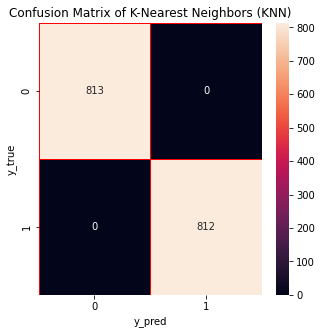

In [30]:
draw_conf_matrix(best_knn_model, "K-Nearest Neighbors (KNN)")

### **6.2 - Support Vector Machine (SVM) Confusion Matrix**

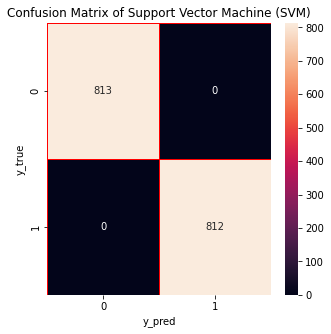

In [31]:
draw_conf_matrix(best_svm_model, "Support Vector Machine (SVM)")

### **6.3 - Random Forest Confusion Matrix**

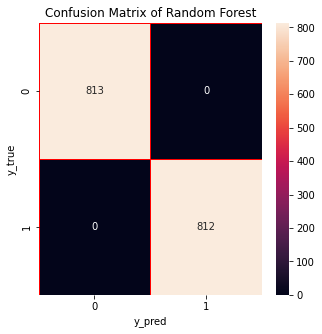

In [33]:
draw_conf_matrix(best_rf_model, "Random Forest")